In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import savgol_filter
import math
import random

In [3]:
# helper functions

def series_append(series, list, keys):
    for i in range(64):
        series[keys[i]].append(float(list[i]))
    return series

def load_series(filename):
    with open(filename, 'r') as csv_in:
        csv_file = list(csv.reader(csv_in))
        series = {}
        keys = csv_file[0]
        for key in keys: series[key] = []
        for i in range(2, len(csv_file), 2):
            series = series_append(series, csv_file[i], keys)
        return [series, int((len(csv_file) - 2) / 2)]

def xyz_centroids(series, i):
    x_sum = 0.0
    y_sum = 0.0
    z_sum = 0.0
    for key in series:
        if (key[-1] == 'x'):
            x_sum += series[key][i]
        elif (key[-1] == 'y'):
            y_sum += series[key][i]
        elif (key[-1] == 'z'):
            z_sum += series[key][i]
    x_sum /= 16.0
    y_sum /= 16.0
    z_sum /= 16.0
    return [x_sum, y_sum, z_sum]

def moving_average(input_list, step_size):
    final_list = []
    for i in range(int((step_size - 1) / 2)):
        final_list.append(None)
    interval_start = 0
    interval_end = int(step_size - 1)
    while (interval_end < len(input_list)):
        final_list.append(int(float(sum(input_list[interval_start : interval_end + 1])) / float(step_size)))
        interval_start += 1
        interval_end += 1
    for i in range(int((step_size - 1) / 2)):
        final_list.append(None)
    return final_list
    


In [ ]:
filepath = '..\\time_series\\raw\\'
in_files = os.listdir(filepath)

for file in in_files:
    filename = filepath + file
    series, num_frames = load_series(filename)
    for key in series:
        if (key[-1] != 'v'):
            series[key] = savgol_filter(series[key], window_length=9, polyorder=3)
    
    writer = csv.writer(open('..\\time_series\\smoothed\\' + file, 'w'))
    writer.writerow(series.keys())
    writer.writerows(zip(*series.values()))

    print(file)

# print(sr_files)


In [ ]:

filepath = '..\\time_series\\smoothed\\'
in_files = os.listdir(filepath)

for csv_file in in_files:
    filename = filepath + csv_file
    series, num_frames = load_series(filename)
    print(csv_file)
    # print(num_frames)
    # print(series)

    with open('..\\time_series\\translationally_normalized\\' + csv_file, 'w') as csv_out:
        for frame in range(num_frames):
            x_cent, y_cent, z_cent = xyz_centroids(series, frame)
            for key in series:
                # x_list.append
                if (key[-1] == 'x'):
                    series[key][frame] -= x_cent
                elif (key[-1] == 'y'):
                    series[key][frame] -= y_cent
                elif (key[-1] == 'z'):
                    series[key][frame] -= z_cent

        writer = csv.writer(csv_out)
        writer.writerow(series.keys())
        writer.writerows(zip(*series.values()))


In [ ]:

# visualization
series, num_frames = load_series('..\\time_series\\smoothed\\SR-O0-F4-B0-S2-L4-L-0004.csv')
print(series['left_heel_y'])

fig, (ax1, ax2) = plt.subplots(2, figsize=(25, 10))

ax1.plot(np.arange(0, num_frames), series['left_heel_y'], color='gray', label='Raw Pose Data')
ax2.plot(np.arange(0, num_frames), series['left_heel_y'], color='gray', label='Raw Pose Data')
ax1.plot(np.arange(0, num_frames), moving_average(series['left_heel_y'], 5), color='green', label='Moving Average')
ax1.legend(loc='upper left')
ax2.plot(np.arange(0, num_frames), savgol_filter(series['left_heel_y'], window_length=9, polyorder=3), color='blue', label='Savitzky-Golay')
ax2.legend(loc='upper left')
plt.show()

In [ ]:

# DO NOT USE

l = series['left_heel_y']
l = savgol_filter(l, window_length=9, polyorder=3)
l = np.array(l)
l -= l.mean()
# print(l)
l = l[6:]

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(25, 15), sharex=False, sharey=False)
ax1.plot(np.arange(0, len(l)), l, color='orange', label='Smoothed Data')

t = np.arange(0, len(l))[1:]

fourier_transform = np.fft.fft(l)

fourier_transform = fourier_transform[1:]

ax2.plot(t, abs(fourier_transform), color='blue', label='Fourier Transform')
ax2.legend(), ax1.legend()
print(abs(fourier_transform))

imax=np.argmax(np.absolute(fourier_transform))
print('VALUE AT IMAX: ' + str(fourier_transform[imax]))
mask=np.zeros_like(fourier_transform)
mask[imax]=1
fourier_transform *= mask
fdata=np.fft.ifft(fourier_transform)
print(np.arctan2(fourier_transform[imax].imag, fourier_transform[imax].real))


ax3.plot(t, fdata, label='Fourier Frequency')
ax3.plot(np.arange(0,len(l)), l, color='orange', label='Smoothed Data')
ax3.legend(loc='upper right')

plt.show()

# print(x_list)
# print(y_list)


# print(series)

35


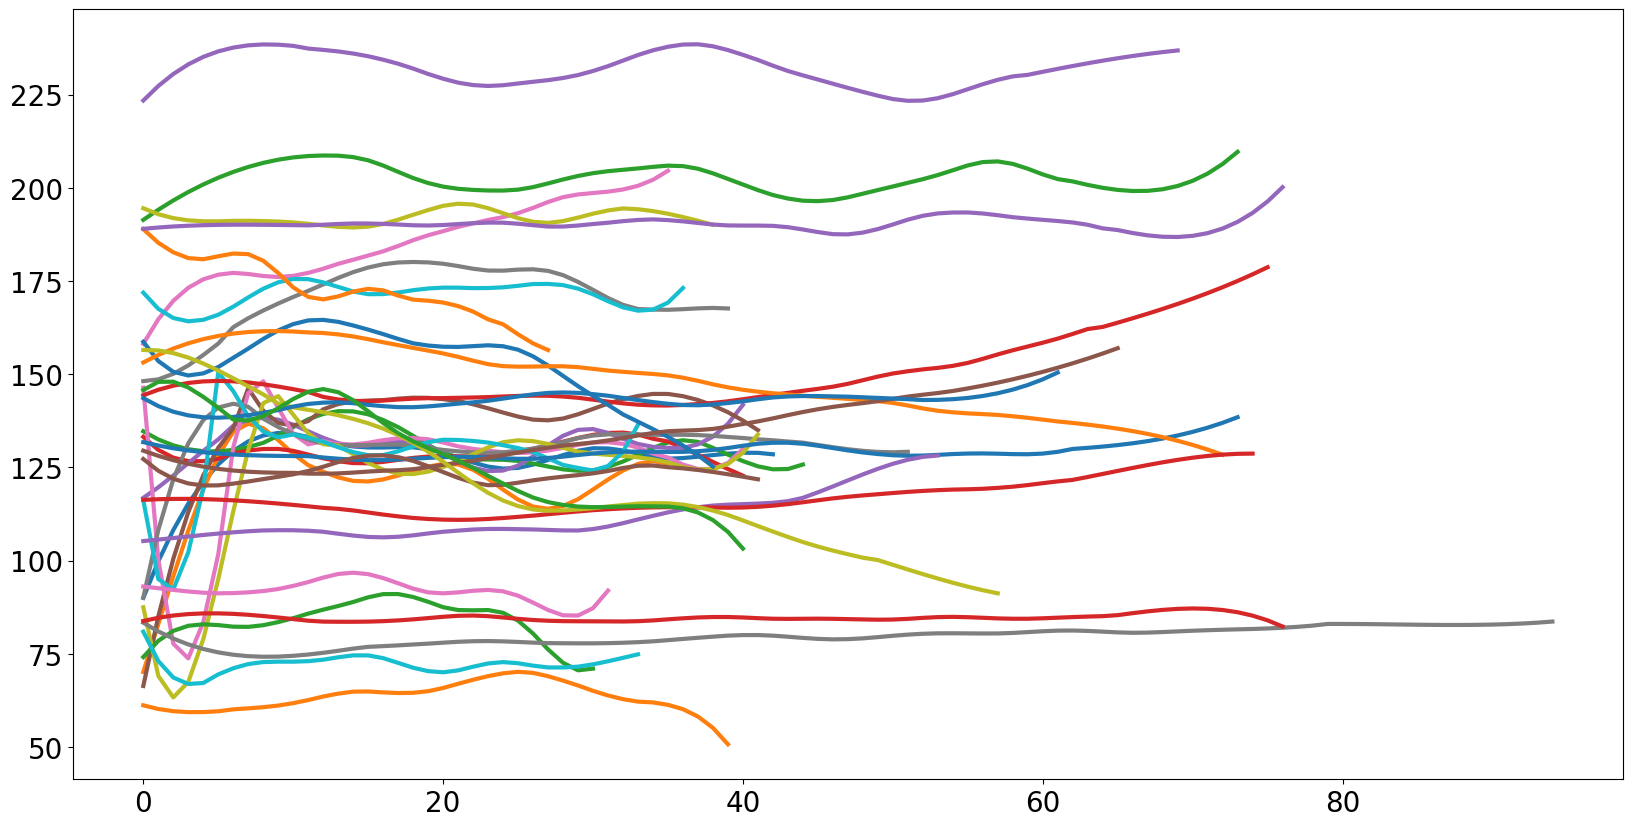

In [31]:
# Exploration of scaling features

normalized_dir = '..\\time_series\\translationally_normalized\\'
normalized_files = os.listdir(normalized_dir)

fig, ax = plt.subplots(1, figsize=(20, 10))

cmp = plt.cm.get_cmap('rainbow', 20)

print(cmp)

counter = 0

for file in normalized_files:
    filename = normalized_dir + file
    series, num_frames = load_series(filename)
    shoulder_x = 'left_shoulder_x'
    shoulder_y = 'left_shoulder_y'
    hip_x = 'left_hip_x'
    hip_y = 'left_hip_y'
    knee_x = 'left_knee_x'
    knee_y = 'left_knee_y'
    if (file[18] == 'R'):
        shoulder_x = 'right_shoulder_x'
        shoulder_y = 'right_shoulder_y'
        hip_x = 'right_hip_x'
        hip_y = 'right_hip_y'
        knee_x = 'right_knee_x'
        knee_y = 'right_knee_y'
    torso_lengths = []
    femur_lengths = []
    ranges = []
    for i in range(num_frames):
        shoulder = [series[shoulder_x][i], series[shoulder_y][i]]
        hip = [series[hip_x][i], series[hip_y][i]]
        knee = [series[knee_x][i], series[knee_y][i]]
        torso_lengths.append(math.dist(shoulder, hip))
        femur_lengths.append(math.dist(knee, hip))

        y_coords = []

        for key in series:
            if (key[-1] == 'y'):
                y_coords.append(series[key][i])

        ranges.append(max(y_coords) - min(y_coords))

    if (random.randint(0, 10) < 9):
        continue

    if (num_frames > 100):
        continue

    counter += 1

    window = int(num_frames) / 3
    if (window % 2 != 1):
        window -= 1

    ax.plot(np.arange(0, num_frames), savgol_filter(torso_lengths, window_length=int(window), polyorder=3), linewidth=3)

    ax.tick_params(labelsize=20)

print(counter)


In [ ]:
for file in normalized_files:
    filename = normalized_dir + file
    series, num_frames = load_series(filename)

    shoulder_x = 'left_shoulder_x'
    shoulder_y = 'left_shoulder_y'
    hip_x = 'left_hip_x'
    hip_y = 'left_hip_y'
    if (file[18] == 'R'):
        shoulder_x = 'right_shoulder_x'
        shoulder_y = 'right_shoulder_y'
        hip_x = 'right_hip_x'
        hip_y = 'right_hip_y'

    for i in range(num_frames): # for each frame
        shoulder = [series[shoulder_x][i], series[shoulder_y][i]]
        hip = [series[hip_x][i], series[hip_y][i]]
        torso_length = math.dist(shoulder, hip)
        for key in series:
            if (key[-1] == 'x' or key[-1] == 'y'):
                series[key][i] *= 1000
                series[key][i] /= torso_length
                
    with open('..\\time_series\\scale_normalized\\' + file, 'w') as csv_out:
        writer = csv.writer(csv_out)
        writer.writerow(series.keys())
        writer.writerows(zip(*series.values()))




In [ ]:
scale_normalized_dir = '..\\time_series\\scale_normalized\\'
scale_normalized_files = os.listdir(scale_normalized_dir)

x_aggregate = []
y_aggregate = []

for file in scale_normalized_files:
    filename = scale_normalized_dir + file
    series, num_frames = load_series(filename)
    for key in series:
        if (key[-1] == 'x'):
            x_aggregate += series[key]
        if (key[-1] == 'y'):
            y_aggregate += series[key]

print(len(x_aggregate))
print(len(y_aggregate))

print(min(x_aggregate))
print(max(x_aggregate))

print(min(y_aggregate))
print(max(y_aggregate))

fig, ax = plt.subplots(2, figsize=(20, 10))
ax[0].hist(x_aggregate, bins=500)
ax[0].set_xlim(min(x_aggregate), max(x_aggregate))
ax[1].hist(y_aggregate, bins=500)
ax[1].set_xlim(min(y_aggregate), max(y_aggregate))
plt.show()